#### Исследовательский проект по анализу данных на Python Часть 1

### Импортируем все необходимые библиотеки

In [620]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") #не показывать предупреждения

### Предварительный анализ

In [621]:
df = pd.read_csv('imdb_movie_data_2023.csv', index_col = 1)
df

,id,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
Movie Name,,,,,,,,,,
Leave the World Behind,0,6.5,90000.0,67.0,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
Wonka,1,7.4,24000.0,66.0,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
Poor Things,2,8.5,6700.0,86.0,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
Killers of the Flower Moon,3,7.8,128000.0,89.0,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
May December,4,7.0,21000.0,85.0,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes
...,...,...,...,...,...,...,...,...,...,...
"Definitely, Maybe",1945,7.1,172000.0,59.0,"Comedy, Drama, Romance",PG-13,2008,1h 52m,"Ryan Reynolds, Rachel Weisz, Abigail Breslin, ...",Adam Brooks
The Fly,1946,7.6,198000.0,79.0,"Drama, Horror, Sci-Fi",R,1986,1h 36m,"Jeff Goldblum, Geena Davis, John Getz, Joy Bou...",David Cronenberg
The Mighty Ducks,1947,6.5,71000.0,46.0,"Comedy, Drama, Family",PG,1992,1h 44m,"Emilio Estevez, Joss Ackland, Lane Smith, Heid...",Stephen Herek


In [622]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1950 entries,  Leave the World Behind to  American Made
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1950 non-null   int64  
 1   Rating      1944 non-null   float64
 2   Votes       1944 non-null   float64
 3   Meta Score  1833 non-null   float64
 4   Genre       1833 non-null   object 
 5   PG Rating   1874 non-null   object 
 6   Year        1950 non-null   int64  
 7   Duration    1948 non-null   object 
 8   Cast        1833 non-null   object 
 9   Director    1833 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 167.6+ KB
None


In [623]:
print(df.shape)

(1950, 10)


Получается, в датасете 1950 строк и 10 столбцов

In [624]:
print("Список названий столбцов таблицы:")
for i in range(len(df.columns)):
    print(i + 1, df.columns[i])
print("\n")
print(df.dtypes)

Список названий столбцов таблицы:
1 id
2 Rating
3 Votes
4 Meta Score
5 Genre
6 PG Rating
7 Year
8 Duration
9 Cast
10 Director


id              int64
Rating        float64
Votes         float64
Meta Score    float64
Genre          object
PG Rating      object
Year            int64
Duration       object
Cast           object
Director       object
dtype: object


1. id - индекс, int64
2. Rating - рейтинг фильма, float64, от 0.0 до 10.0
3. Votes - кол-во голосов, float64
4. Meta Score - рейтинг фильма на Meta Score, float64, от 0 до 100
5. Genre - жанр фильма, string
6. PG Rating - возрастной рейтинг фильма, string
7. Year - год выхода премьеры фильма, int64
8. Duration - длительность, string
9. Cast - каст актеров фильма, string
10. Director - режиссер, string

In [625]:
df = df.dropna()
print(df.shape[0])

1784


После удаления пустых значений из датасета осталось 1784 строки, т.е. пустых значений было 1950 - 1784 = 166

Изменим колонку Duration, чтобы в ней была длительность фильма в минутах

In [626]:
a = df['Duration']
print(len(a))
for i in range(len(a)):
    hours = int(a[i].split("h")[0])
    minutes = a[i].split("h")[1][:-1]
    if len(minutes) == 0:
        minutes = 0
    else:
        minutes = int(minutes)
    a[i] = hours * 60 + minutes
df = df.astype({'Duration': int})
print(df['Duration'])

1784
Movie Name
 Leave the World Behind        138
 Wonka                         116
 Poor Things                   141
 Killers of the Flower Moon    206
 May December                  117
                              ... 
 Annette                       141
 Definitely, Maybe             112
 The Fly                        96
 The Mighty Ducks              104
 American Made                 115
Name: Duration, Length: 1784, dtype: int64


Перекодируем возрастной рейтинг (PG Rating) в категориальную переменную:

In [627]:
for i in range(df.shape[0]):
    if df["PG Rating"][i] == "nan" or df["PG Rating"][i] == "Unrated" or df["PG Rating"][i] == "NaN" or df["PG Rating"][i] == "Approved" or df["PG Rating"][i] == "Passed":
        df["PG Rating"][i] = "Unrated"
    elif df["PG Rating"][i] == "G" or df["PG Rating"][i] == "TV-G":
        df["PG Rating"][i] = "0+"
    elif df["PG Rating"][i] == "PG" or df["PG Rating"][i] == "TV-Y7" or df["PG Rating"][i] == "TV-PG":
        df["PG Rating"][i] = "6+"
    elif df["PG Rating"][i] == "13+" or df["PG Rating"][i] == "PG-13" or df["PG Rating"][i] == "GP" or df["PG Rating"][i] == "TV-14":
        df["PG Rating"][i] = "13+"
    elif df["PG Rating"][i] == "R" or df["PG Rating"][i] == "16+" or df["PG Rating"][i] == "TV-MA":
      df["PG Rating"][i] = "16+"
    elif df["PG Rating"][i] == "NC-17" or df["PG Rating"][i] == "18+" or df["PG Rating"][i] == "X":
        df["PG Rating"][i] = "18+"


column_values = set(df['PG Rating'].values) # достанем всем значения из колонки PG Rating и преобразуем в множество
column_values = [str(i) for i in column_values] # преобразуем в упорядоченный список значения колонки PG Rating
print(column_values) # выведем для наглядности найденные значения

print(df['PG Rating'].value_counts)
df['PG Rating'] = pd.Categorical(df['PG Rating'], categories=column_values, ordered=True) # ordered=True - категория является порядковой
print(df.columns)
print(df.dtypes)
print(df['PG Rating'].value_counts)

['0+', 'Unrated', '18+', '6+', '16+', '13+']
<bound method IndexOpsMixin.value_counts of Movie Name
 Leave the World Behind        16+
 Wonka                          6+
 Poor Things                   16+
 Killers of the Flower Moon    16+
 May December                  16+
                              ... 
 Annette                       16+
 Definitely, Maybe             13+
 The Fly                       16+
 The Mighty Ducks               6+
 American Made                 16+
Name: PG Rating, Length: 1784, dtype: object>
Index(['id', 'Rating', 'Votes', 'Meta Score', 'Genre', 'PG Rating', 'Year',
       'Duration', 'Cast', 'Director'],
      dtype='object')
id               int64
Rating         float64
Votes          float64
Meta Score     float64
Genre           object
PG Rating     category
Year             int64
Duration         int64
Cast            object
Director        object
dtype: object
<bound method IndexOpsMixin.value_counts of Movie Name
 Leave the World Behind        1

Перекодируем жанр фильма (Genre) в категориальную переменную:

In [628]:
column_values_genre = set(df['Genre'].values) # достанем всем значения из колонки Genre и преобразуем в множество
column_values_genre = list(set(' '.join(column_values_genre).replace(",", ' ').split()))
print(column_values_genre) # выведем для наглядности найденные значения
#print(['Mystery', 'Sci-Fi', 'Animation', 'Comedy', 'Documentary', 'Sport', 'Family', 'Action', 'History', 'Western', 'Romance', 'Biography', 'Thriller', 'Horror', 'Fantasy', 'Crime', 'Drama', 'Adventure', 'Music', 'Musical', 'War'])
print(len(column_values_genre))

#df['Genre'] = pd.Categorical(df['Genre'], categories=column_values_genre, ordered=False) # ordered=Fasle - категория не является порядковой
for col in column_values_genre:
   df[col] = 0
for i in range(len(df)):
  for j in df["Genre"][i].replace(",", ' ').split():
    #print(j)
    df[j][i] = 1


# Выводим результат
print(df)
   # df[col] = pd.Series(dtype='uint8')
# Создание дамми переменных
#dummy_genre = pd.get_dummies(df['Genre'])

# Добавление дамми переменных к исходному DataFrame
#df = pd.concat([df, dummy_genre], axis=1)

# Вывод результатов
#print(df.columns)
#print(df.dtypes)

['War', 'Mystery', 'Drama', 'Western', 'Comedy', 'Biography', 'Family', 'Adventure', 'Fantasy', 'History', 'Musical', 'Sport', 'Sci-Fi', 'Romance', 'Horror', 'Crime', 'Animation', 'Action', 'Documentary', 'Music', 'Thriller']
21
                               id  Rating     Votes  Meta Score  \
Movie Name                                                        
 Leave the World Behind         0     6.5   90000.0        67.0   
 Wonka                          1     7.4   24000.0        66.0   
 Poor Things                    2     8.5    6700.0        86.0   
 Killers of the Flower Moon     3     7.8  128000.0        89.0   
 May December                   4     7.0   21000.0        85.0   
...                           ...     ...       ...         ...   
 Annette                     1944     6.3   22000.0        67.0   
 Definitely, Maybe           1945     7.1  172000.0        59.0   
 The Fly                     1946     7.6  198000.0        79.0   
 The Mighty Ducks            1947 

Создадим еще один столбец, принимающий значение 1, если рейтинг фильма >= 7, и 0, если рейтинг фильма < 7

In [629]:
df["Highrated"] = 0
for i in range(df.shape[0]):
    if df["Rating"][i] >= 7:
        df["Highrated"][i] = 1
print(df.columns)

Index(['id', 'Rating', 'Votes', 'Meta Score', 'Genre', 'PG Rating', 'Year',
       'Duration', 'Cast', 'Director', 'War', 'Mystery', 'Drama', 'Western',
       'Comedy', 'Biography', 'Family', 'Adventure', 'Fantasy', 'History',
       'Musical', 'Sport', 'Sci-Fi', 'Romance', 'Horror', 'Crime', 'Animation',
       'Action', 'Documentary', 'Music', 'Thriller', 'Highrated'],
      dtype='object')


Задачи исследования:

1. Описание датасета:
*   Загрузить и описать структуру выбранного датасета.
*   Убедиться в наличии не менее 200 наблюдений и не менее 10 переменных.

2. Предобработка данных:


*   Произвести анализ и заполнение пропущенных значений.
*   Изменить типы данных переменных на более подходящие.
*   Создать новые переменные, отражающие интересующие аспекты данных.

3. Исследование зависимостей и взаимосвязей:


*   Проверить гипотезы о взаимосвязи между жанром и рейтингом, продолжительностью фильма и рейтингом, и др.
*   Построить графики, которые могут отобразить тенденции и взаимосвязи в данных.

4. Статистический анализ:

*   Провести тест Хи-квадрат для оценки взаимосвязи между категориальными переменными.
*   Рассчитать корреляции между числовыми переменными для оценки степени связи.

5. Описательная статистика:

*   Рассчитать описательные статистики для оценки центральной тенденции и разброса значений по всей выборке и по различным группам.

6. Моделирование:

*   Построить модель линейной регрессии для оценки влияния предикторов (например, количество голосов, Meta Score) на рейтинг.
*   Построить модель бинарной регрессии, если возможно, с учетом бинарной зависимой переменной.

7. Кластерный анализ:

*   Провести кластерный анализ для выявления групп схожих объектов в данных.
*   Дать названия и описать характеристики полученных кластеров.
8. Выводы и интерпретация результатов:

*   Сделать выводы относительно того, какие гипотезы подтвердились, а какие нет.
*   Проанализировать результаты моделирования и выявить ключевые предикторы, влияющие на рейтинг фильмов.
9. Обобщение и общие выводы:

*   Сформулировать общие выводы по результатам анализа данных.
*   Выделить ожидаемые и неожиданные закономерности.
*   Предложить возможные практические рекомендации на основе полученных результатов.





Составим 10 гипотез:
1. Фильмы определенных жанров имеют более высокий рейтинг.
2. Фильмы с участием определенных актеров или режиссеров имеют более высокий рейтинг.
3. Существует зависимость между продолжительностью фильма и его рейтингом.
4. Фильмы с высоким Meta Score имеют более высокий рейтинг.
5. Чем старше фильм, тем рейтинг выше (Раньше было лучше?)
6. У Квентина Тарантино самые высокооцененные фильмы?
7. Рейтинг на IMDB и на Meta Score сильно коррелируют друг с другом
8. Фильмы с участием Леонардо Ди Каприо имеют в среднем более высокий рейтинг.
9. Фильмы с возрастным рейтингом 18+ имеют более низкий рейтинг.
10. Анимированные фильмы длятся в среднем меньше, чем остальные (из-за сложности производства анимации)

### Построение графиков


Text(0.5, 1.0, 'Movie Count per Top Directors')

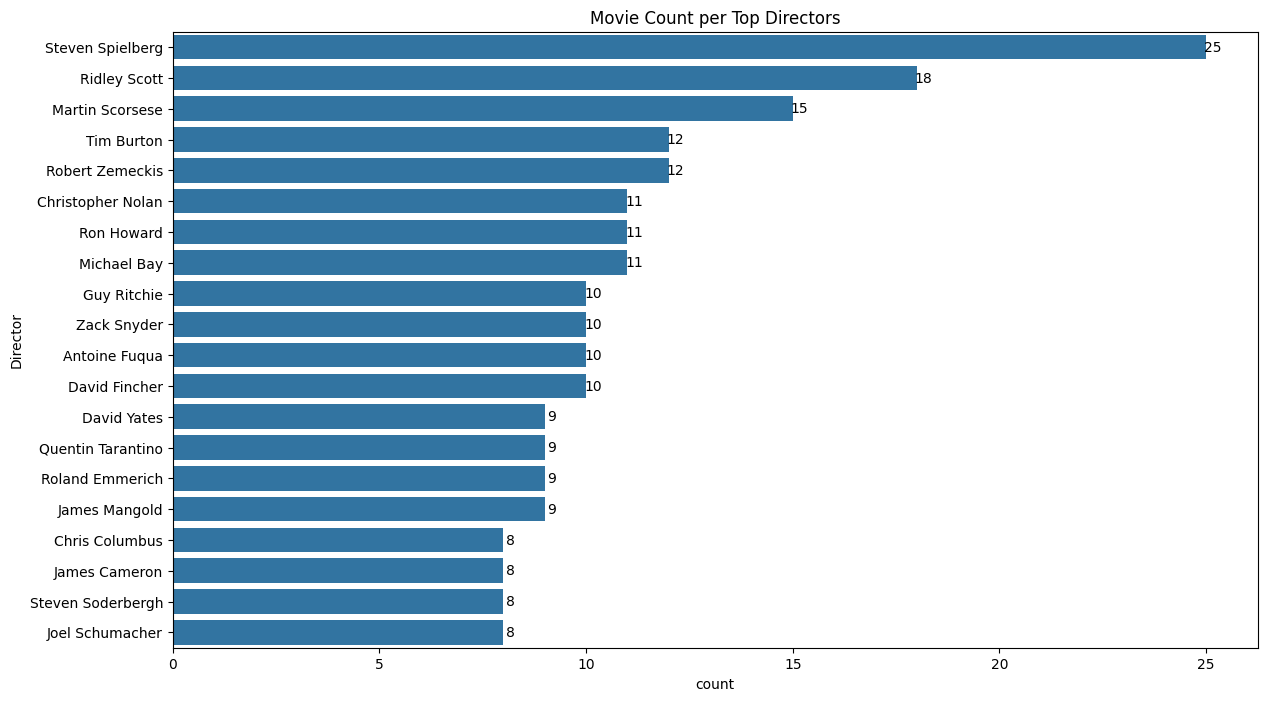

In [630]:
top_directors = df['Director'].value_counts()[:20]
top_directors = top_directors.reset_index(name='count')
top_directors.columns = ["Director", "count"]
df_top_directors = df[df['Director'].isin(top_directors['Director'])]

fig = plt.figure(figsize=(14,8))
ax = sns.barplot(data=top_directors, y='Director', x='count')

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='black', xytext=(5 * (abs(p.get_width())/p.get_width()), 0),
                textcoords='offset points')
plt.title('Movie Count per Top Directors')

Text(0.5, 1.0, 'Mean Rating per Top Directors')

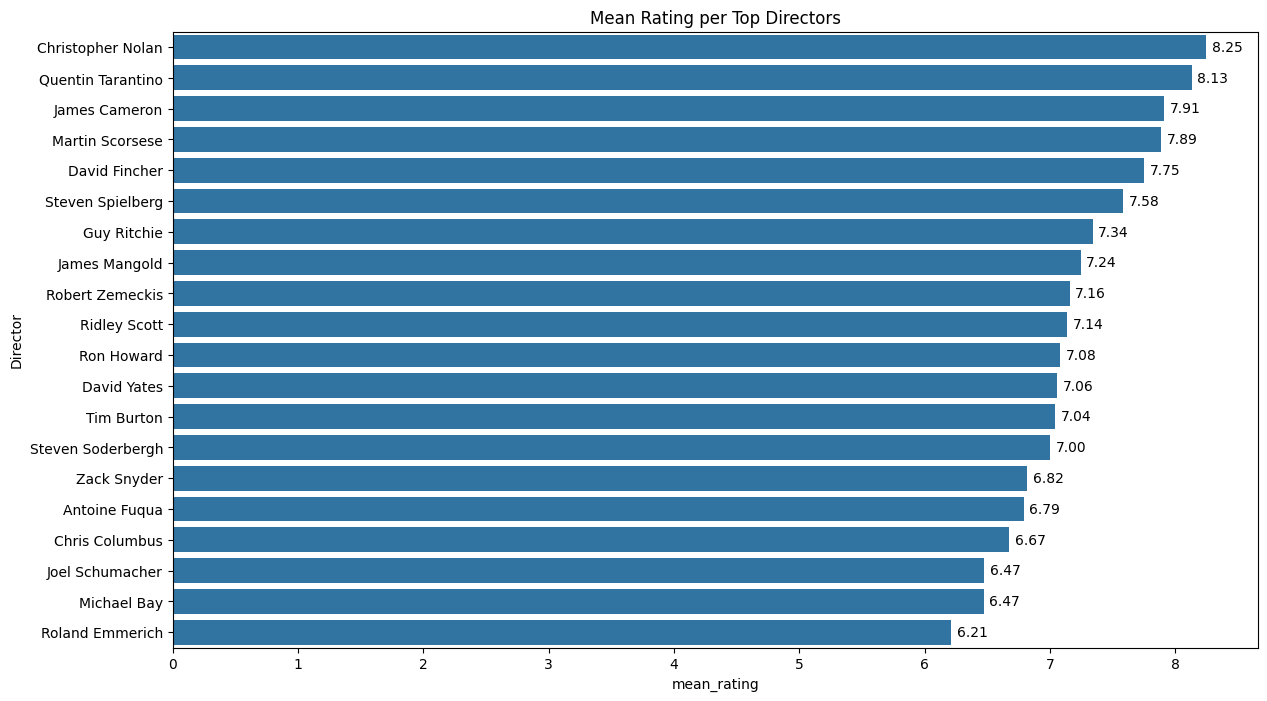

In [631]:
mean_rating_per_director = df_top_directors.groupby('Director')['Rating'].mean().reset_index(name='mean_rating')
mean_rating_per_director = mean_rating_per_director.sort_values('mean_rating', ascending = False)

fig = plt.figure(figsize=(14,8))
ax = sns.barplot(data=mean_rating_per_director, y='Director', x='mean_rating')

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='black', xytext=(15 * (abs(p.get_width())/p.get_width()), 0),
                textcoords='offset points')
plt.title('Mean Rating per Top Directors')

Text(0.5, 1.0, 'Top Actors by Movie Count')

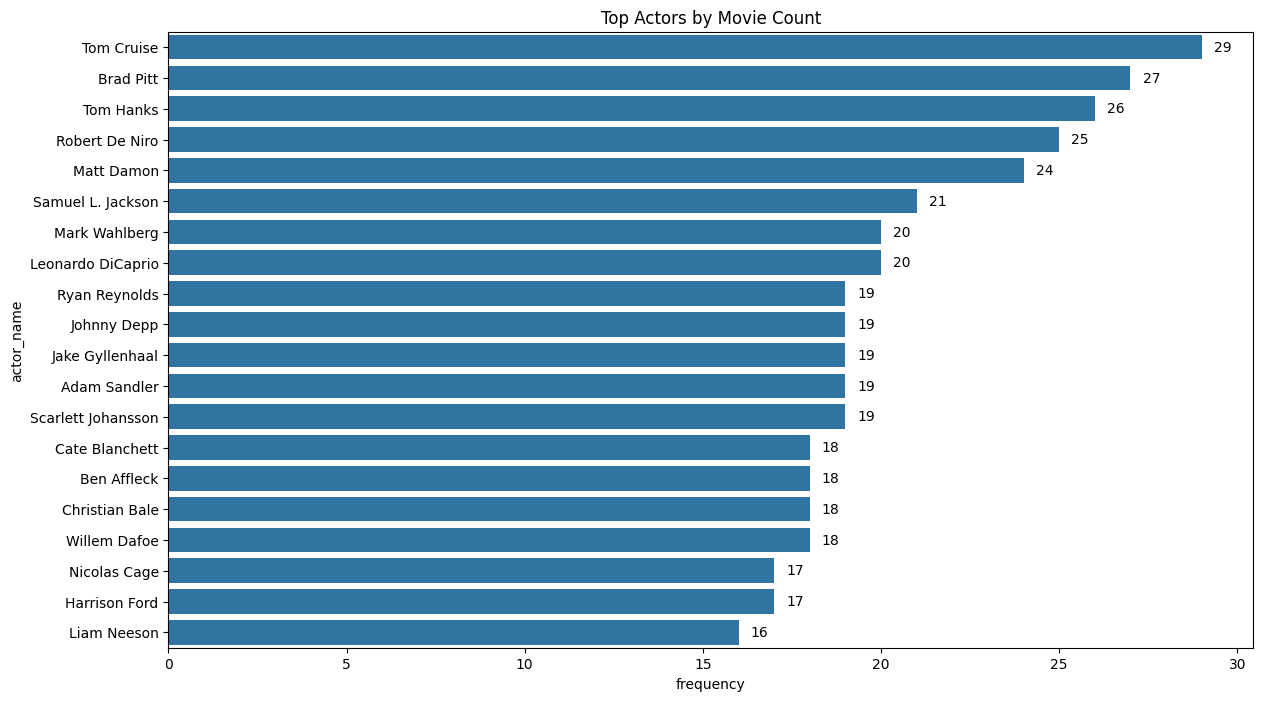

In [632]:
actors_dict = dict()
df_no_cast_na = df.dropna(subset=['Cast'])
cast_list = df_no_cast_na['Cast'].tolist()
for actors in cast_list:
    for actor in actors.split(','):
        actor = actor.strip()
        if actor in actors_dict:
            actors_dict[actor] += 1
        else:
            actors_dict[actor] = 1

top_actors_df = pd.DataFrame(list(actors_dict.items()), columns=['actor_name', 'frequency'])

top_actors_df = top_actors_df.sort_values(by='frequency', ascending=False)

top_actors_df = top_actors_df.head(20)

fig = plt.figure(figsize=(14,8))
ax = sns.barplot(data=top_actors_df, y='actor_name', x='frequency')

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='black', xytext=(15 * (abs(p.get_width())/p.get_width()), 0),
                textcoords='offset points')
plt.title('Top Actors by Movie Count')

<Axes: xlabel='Year', ylabel='Density'>

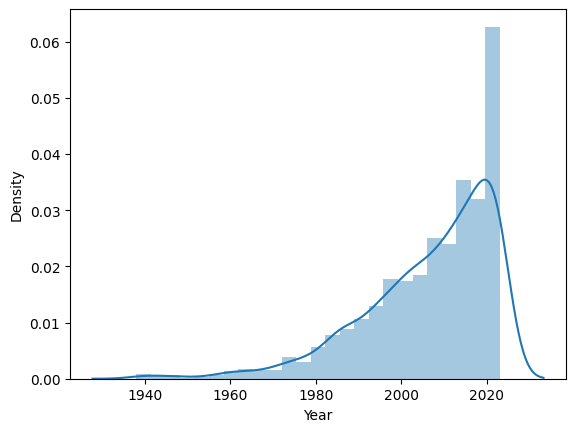

In [633]:
sns.distplot(df["Year"])

Text(0.5, 1.0, 'Meta Score by IMDB Rating')

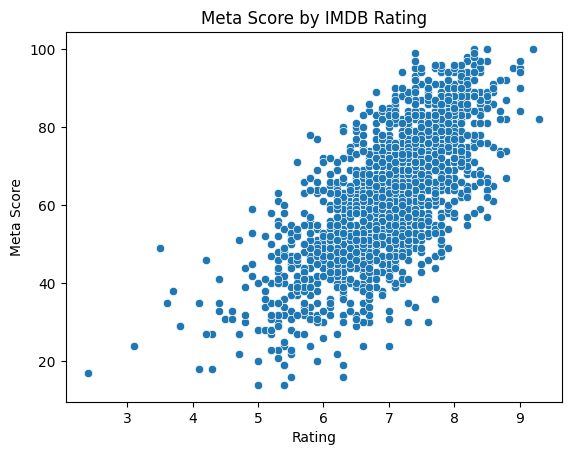

In [634]:
sns.scatterplot(data = df, x = 'Rating', y = 'Meta Score')
plt.title('Meta Score by IMDB Rating')

<Axes: title={'center': 'Возрастной рейтинг'}>

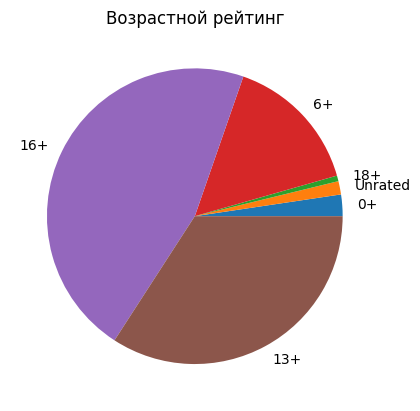

In [635]:
df.groupby('PG Rating').size().plot(kind='pie', title = 'Возрастной рейтинг')

Как видим из круговой диаграммы большинство фильмов принадлежат 3 возрастным рейтингам - это 6+, 13+ и 16+

PG Rating
0+         7.500000
Unrated    7.769231
18+        6.981818
6+         6.970588
16+        7.015655
13+        6.786371
Name: Rating, dtype: float64


<Axes: xlabel='PG Rating'>

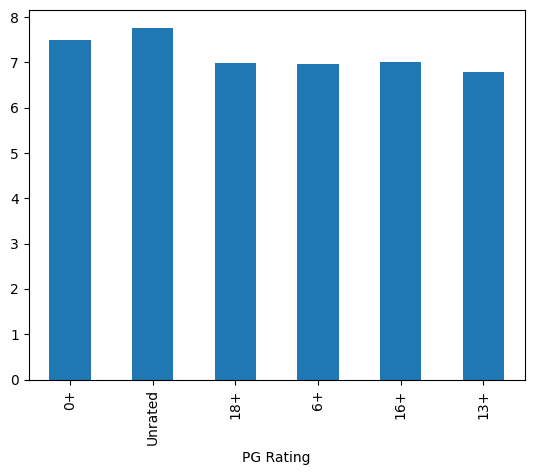

In [636]:
print(df.groupby('PG Rating')['Rating'].mean())
df.groupby('PG Rating')['Rating'].mean().plot(kind='bar')

Как видим фильмы с возрастным рейтингом 18+ имеют рейтинг выше, чем фильмы 13+

### Построение сводных таблиц

In [637]:
pivot_table_rating_pg = pd.pivot_table(df, values='Rating', index='PG Rating', aggfunc=np.mean)
pivot_table_rating_pg

,Rating
PG Rating,
0+,7.500000
Unrated,7.769231
18+,6.981818
6+,6.970588
16+,7.015655
13+,6.786371


Создадим столбец с главным актером фильма (идущим в списке первым) и сравним рейтинги фильмов, в которых они играли

In [638]:
df['Lead Actor'] = df['Cast'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else None)
pivot_table_rating_actor = pd.pivot_table(df, values='Rating', index='Lead Actor', aggfunc=np.mean)

print(pivot_table_rating_actor)
print('Средний рейтинг фильмов, в которых играл Леонардо ДиКаприо', pivot_table_rating_actor.loc['Leonardo DiCaprio'])
print('Средний рейтинг фильмов', df['Rating'].mean())

                      Rating
Lead Actor                  
Aaron Paul               7.3
Aaron Taylor-Johnson     7.0
Abby Ryder Fortson       7.3
Abigail Cowen            6.7
Adam Devine              5.4
...                      ...
Zachary Levi             6.5
Zachary Quinto           7.1
Zack Gottsagen           7.6
Zoey Deutch              6.2
Zooey Deschanel          7.7

[797 rows x 1 columns]
Средний рейтинг фильмов, в которых играл Леонардо ДиКаприо Rating    7.644444
Name: Leonardo DiCaprio, dtype: float64
Средний рейтинг фильмов 6.95269058295964


In [639]:
# Создадим столбец с десятилетиями
df['Decade'] = (df['Year'] // 10) * 10

# Создадим сводную таблицу
pivot_table_rating_decade = pd.pivot_table(df, values='Rating', index='Decade', aggfunc=np.mean)

# Выведем таблицу
print(pivot_table_rating_decade)

          Rating
Decade          
1930    7.850000
1940    7.837500
1950    8.220000
1960    7.780000
1970    7.643636
1980    7.273469
1990    7.174678
2000    7.008130
2010    6.882098
2020    6.525526


In [640]:
genres = ['War', 'Mystery', 'Drama', 'Western',
       'Comedy', 'Biography', 'Family', 'Adventure', 'Fantasy', 'History',
       'Musical', 'Sport', 'Sci-Fi', 'Romance', 'Horror', 'Crime', 'Animation',
       'Action', 'Documentary', 'Music', 'Thriller']
d = dict()
for i in genres:
    d[i] = df.groupby(df[i])['Votes'].sum()[0]
d = sorted(d.items(), key=lambda x: x[1])
d = dict(d)
for key in d:
    print(key, d[key])

Drama 278692562.0
Action 306646595.0
Adventure 334013577.0
Comedy 393526095.0
Crime 424685603.0
Sci-Fi 426573677.0
Thriller 433000677.0
Fantasy 462570377.0
Mystery 468210177.0
Romance 474183677.0
Horror 483489516.0
Biography 489701303.0
Animation 491053577.0
Family 498228777.0
History 509189140.0
War 510123036.0
Music 513896416.0
Sport 516253377.0
Musical 518124177.0
Western 518424777.0
Documentary 521883697.0


In [641]:
ct_survive_sex = pd.crosstab(df['Highrated'], df['PG Rating'])
print(ct_survive_sex)
# сохраним таблицу сопряжённости в переменную
stats.chi2_contingency(ct_survive_sex)
print('chi2 = ', stats.chi2_contingency(ct_survive_sex)[0], '   p-value =', stats.chi2_contingency(ct_survive_sex)[1])

PG Rating  0+  Unrated  18+   6+  16+  13+
Highrated                                 
0           7        2    4  119  351  348
1          35       24    7  153  473  261
chi2 =  64.80191444640835    p-value = 1.2319407158764827e-12


H1: существует взаимосвязь между высокой оценкой фильма и возрастным рейтингом

p-value < 0.05

p-value < 0.01

Гипотеза H1 принимается на уровне значимости 5%.

Гипотеза H1 принимается на уровне значимости 1%.

### Описательные статистики

In [642]:
rating_statistics_all = df['Rating'].describe()

rating_statistics_all

count    1784.000000
mean        6.952691
std         0.862546
min         2.400000
25%         6.400000
50%         7.000000
75%         7.600000
max         9.300000
Name: Rating, dtype: float64

In [643]:
rating_statistics_all = df['Meta Score'].describe()

rating_statistics_all

count    1784.000000
mean       62.142377
std        16.569672
min        14.000000
25%        50.000000
50%        63.000000
75%        74.000000
max       100.000000
Name: Meta Score, dtype: float64

In [644]:
rating_statistics_all = df['Duration'].describe()

rating_statistics_all

count    1784.000000
mean      117.170404
std        21.743498
min        69.000000
25%       102.000000
50%       114.000000
75%       129.000000
max       246.000000
Name: Duration, dtype: float64

### Корреляции

In [645]:
df[['Rating', 'Votes', 'Meta Score', 'Year', 'Duration']].corr('spearman') #рассчитываются коэффициенты корреляции Пирсона между всеми возможными парами числовых переменных
#по диагонали всегда 1, это корреляция переменной с самой собой

,Rating,Votes,Meta Score,Year,Duration
Rating,1.000000,0.583898,0.705997,-0.348299,0.305038
Votes,0.583898,1.000000,0.371810,-0.276080,0.332162
Meta Score,0.705997,0.371810,1.000000,-0.138537,0.179247
Year,-0.348299,-0.276080,-0.138537,1.000000,0.021502
Duration,0.305038,0.332162,0.179247,0.021502,1.000000


<Axes: >

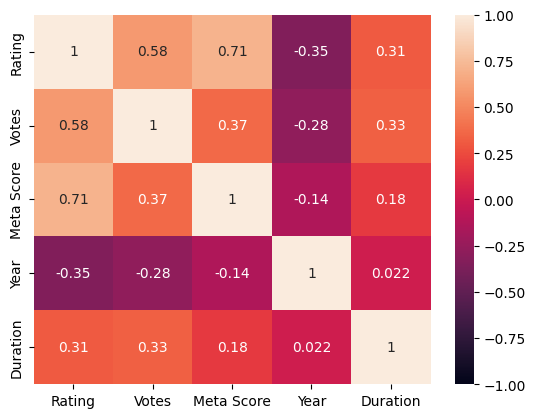

In [646]:
sns.heatmap(df[['Rating', 'Votes', 'Meta Score', 'Year', 'Duration']].corr('spearman'), annot=True, vmax=1, vmin=-1) #метки значений

In [647]:
stats.spearmanr(df['Rating'], df['Meta Score'])

SignificanceResult(statistic=0.7059974648632289, pvalue=2.6358668933999212e-269)

H1: Существует взаимосвязь между рейтингом на IMDB и на Meta Score

1. Статистическая значимость взаимосвязи: поскольку p-value < 0.05, гипотеза H1 подтвердилась.
2. Направление взаимосвязи: коэффициент корреляции положительный, следовательно, между переменными наблюдается прямая взаимосвязь.
3. Сила взаимосвязи: коэффициент корреляции равен 0.7, следовательно, между переменными наблюдается сильная корреляция.

### Линейная регрессия

In [648]:
#корреляции зависимой переменной со всеми остальными по убыванию значений коэффициентов корреляции
df.corrwith(df['Duration']).sort_values(ascending=False)

Duration       1.000000
Votes          0.331300
Rating         0.330693
Drama          0.258662
Highrated      0.245788
History        0.214149
Meta Score     0.213932
Action         0.162734
Biography      0.161758
War            0.142909
Adventure      0.100236
Crime          0.088377
Documentary    0.070312
Sci-Fi         0.055349
Fantasy        0.046517
Western        0.031534
Musical        0.024477
Music          0.001425
Mystery       -0.009379
Sport         -0.012223
Year          -0.017310
Decade        -0.022426
Romance       -0.036885
Thriller      -0.041155
Family        -0.080769
id            -0.161406
Horror        -0.172434
Animation     -0.222303
Comedy        -0.372785
dtype: float64

Видим, что длительность фильма не сильно коррелирует с переменными, так что можем взять почти все

In [649]:
df_model1 = df.dropna(subset=['Duration', 'Votes', 'Rating', 'Mystery', 'Sci-Fi', 'Animation', 'Comedy', 'Documentary',
                             'Sport', 'Family', 'Action', 'History', 'Western', 'Romance',
                             'Biography', 'Thriller', 'Horror', 'Fantasy', 'Crime', 'Drama',
                             'Adventure', 'Music', 'Musical', 'War'])
x_mult = df_model1[['Votes', 'Rating', 'Mystery', 'Sci-Fi', 'Animation', 'Comedy', 'Documentary',
                             'Sport', 'Family', 'Action', 'History', 'Western', 'Romance',
                             'Biography', 'Thriller', 'Horror', 'Fantasy', 'Crime', 'Drama',
                             'Adventure', 'Music', 'Musical', 'War']]
y = df_model1['Duration']
x_mult_constant = sm.add_constant(x_mult)
model1 = sm.OLS(y, x_mult_constant).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     48.47
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          1.06e-168
Time:                        23:33:44   Log-Likelihood:                -7586.7
No. Observations:                1784   AIC:                         1.522e+04
Df Residuals:                    1760   BIC:                         1.535e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          81.1663      4.631     17.525      

In [650]:
print(sm.OLS(zscore(y), zscore(x_mult)).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               Duration   R-squared (uncentered):                   0.388
Model:                            OLS   Adj. R-squared (uncentered):              0.380
Method:                 Least Squares   F-statistic:                              48.50
Date:                Sun, 25 Feb 2024   Prob (F-statistic):                   8.34e-169
Time:                        23:33:44   Log-Likelihood:                         -2093.7
No. Observations:                1784   AIC:                                      4233.
Df Residuals:                    1761   BIC:                                      4360.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [651]:
print('R^2 = {:f}'.format(model1.rsquared))
print('F-test significance = {:f}'.format(model1.f_pvalue))

R^2 = 0.387802
F-test significance = 0.000000


In [652]:
f'Статистически значимые параметры модели: {model1.pvalues[model1.pvalues < 0.05].index.values}'

"Статистически значимые параметры модели: ['const' 'Votes' 'Rating' 'Animation' 'Comedy' 'Documentary' 'Action'\n 'History' 'Romance' 'Biography' 'Horror' 'Fantasy' 'Crime' 'Drama'\n 'Adventure' 'Musical' 'War']"

In [653]:
f'Статистически не значимые параметры модели: {model1.pvalues[model1.pvalues > 0.05].index.values}'

"Статистически не значимые параметры модели: ['Mystery' 'Sci-Fi' 'Sport' 'Family' 'Western' 'Thriller' 'Music']"

Интерпретация значений коэффициентов линейной регрессии:
* Каждый отзыв увеличивает длительность фильма на 1.155e-05 минуты или на 0.693 миллисекунды
* С каждым увеличением рейтинга на IMDB длительность фильма больше на 3.86 минуты или 232 секунды
* Если фильм является анимированным, то длительность сокращается на 21 минуту
* Если фильм является комедией, то длительность сокращается на 9 минут
* Если фильм является документальным, то длительность увеличивается на 29 минут
* Если фильм является боевиком, то длительность увеличивается на 5 минут
* Если фильм является историческим, то длительность увеличивается на 20 минут
* Если фильм является романсом, то длительность увеличивается на 3,5 минуты
* Если фильм является биографическим, то длительность увеличивается на 5,5 минут
* Если фильм является хоррором, то длительность сокращается на 5 минут
* Если фильм является фэнтези, то длительность увеличивается на 4 минуты
* Если фильм является криминальным, то длительность увеличивается на 4 минуты
* Если фильм является драмой, то длительность увеличивается на 7 минут
* Если фильм является приключением, то длительность увеличивается на 9,5 минут
* Если фильм является мюзиклом, то длительность увеличивается на 11 минут
* Если фильм является военным, то длительность увеличивается на 14,5 минут

### Бинарный анализ данных

In [654]:
df['PG Rating'].value_counts()

16+        824
13+        609
6+         272
0+          42
Unrated     26
18+         11
Name: PG Rating, dtype: int64

Референтная группа 6+

In [655]:
for i in genres:
    print(i, df[i].sum())

War 32
Mystery 192
Drama 822
Western 12
Comedy 609
Biography 106
Family 126
Adventure 514
Fantasy 184
History 53
Musical 23
Sport 29
Sci-Fi 216
Romance 234
Horror 191
Crime 289
Animation 94
Action 591
Documentary 5
Music 40
Thriller 331


Референтная группа Drama (встречается чаще всего)

In [656]:
PG_dummies=pd.get_dummies(df['PG Rating'])
PG_dummies.head()

,0+,Unrated,18+,6+,16+,13+
Movie Name,,,,,,
Leave the World Behind,0,0,0,0,1,0
Wonka,0,0,0,1,0,0
Poor Things,0,0,0,0,1,0
Killers of the Flower Moon,0,0,0,0,1,0
May December,0,0,0,0,1,0


In [657]:
df = pd.concat([df, PG_dummies], axis=1)

In [658]:
df_model2 = df.dropna(subset=['Meta Score', '0+', 'Unrated', '18+', '16+', '13+', 'Year',
       'Duration', 'Fantasy', 'Western', 'Sport', 'Comedy',
       'War', 'Horror', 'Action', 'Biography', 'Adventure', 'Music',
       'History', 'Sci-Fi', 'Mystery', 'Animation', 'Documentary', 'Thriller',
       'Musical', 'Romance', 'Crime', 'Family', 'Highrated'])

In [659]:
x_mult = df_model2[['Meta Score', '0+', 'Unrated', '18+', '16+', '13+', 'Year',
       'Duration', 'Fantasy', 'Western', 'Sport', 'Comedy',
       'War', 'Horror', 'Action', 'Biography', 'Adventure', 'Music',
       'History', 'Sci-Fi', 'Mystery', 'Animation', 'Documentary', 'Thriller',
       'Musical', 'Romance', 'Crime', 'Family']]
y = df_model2['Highrated']

x_mult_constant = sm.add_constant(x_mult)

In [660]:
model2 = sm.Logit(y, x_mult_constant).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.414927
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Highrated   No. Observations:                 1784
Model:                          Logit   Df Residuals:                     1755
Method:                           MLE   Df Model:                           28
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.3994
Time:                        23:33:44   Log-Likelihood:                -740.23
converged:                       True   LL-Null:                       -1232.4
Covariance Type:            nonrobust   LLR p-value:                2.936e-189
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         107.1147     11.592      9.240      0.000      84.394     129.835
Meta Score      0.1028    

In [661]:
coefs = pd.DataFrame()
coefs['Coefs'] = model2.params[1:]
coefs['Features'] = model2.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model2.params[0])
coefs
#отдельно выводим коэффициенты регрессии

Intercept =  107.11465336238398


,Coefs
Features,
Meta Score,0.102752
0+,-0.099363
Unrated,-0.469008
18+,-0.261282
16+,0.206722
13+,0.076072
Year,-0.058063
Duration,0.030655
Fantasy,-0.191220


In [662]:
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs
#коэффициенты регрессии и отношения шансов

,Coefs,OddsRatio
Features,,
Meta Score,0.102752,1.108216
0+,-0.099363,0.905414
Unrated,-0.469008,0.625622
18+,-0.261282,0.770064
16+,0.206722,1.229641
13+,0.076072,1.079040
Year,-0.058063,0.943590
Duration,0.030655,1.031130
Fantasy,-0.191220,0.825951


In [663]:
def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'

In [664]:
pvals = pd.DataFrame()
pvals['p_values'] = model2.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model2.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
Meta Score,0.000,significant
0+,0.882,non-significant
Unrated,0.626,non-significant
18+,0.757,non-significant
16+,0.473,non-significant
13+,0.783,non-significant
Year,0.000,significant
Duration,0.000,significant
Fantasy,0.420,non-significant


In [665]:
print('R^2 = {:f}'.format(model2.prsquared))
print('Model significance = {:f}'.format(model2.llr_pvalue))

R^2 = 0.399360
Model significance = 0.000000


In [666]:
f'Статистически значимые предикторы: {model2.pvalues[model2.pvalues < 0.05].index.values}'

"Статистически значимые предикторы: ['const' 'Meta Score' 'Year' 'Duration' 'Horror' 'Biography' 'Adventure'\n 'Animation']"

In [667]:
f'Статистически не значимые предикторы: {model2.pvalues[model2.pvalues > 0.05].index.values}'

"Статистически не значимые предикторы: ['0+' 'Unrated' '18+' '16+' '13+' 'Fantasy' 'Western' 'Sport' 'Comedy'\n 'War' 'Action' 'Music' 'History' 'Sci-Fi' 'Mystery' 'Documentary'\n 'Thriller' 'Musical' 'Romance' 'Crime' 'Family']"

Интерпретация значений коэффициентов бинарной регрессии:

* Увеличение рейтинга Meta Score на 1 увеличивает шансы высокой оценки фильма на 10 %
* Каждый следующий год уменьшает шансы высокой оценки фильма на 6 %
* Увеличение длительности фильма на 1 минуту увеличивает шансы высокой оценки фильма на 3 %
* Хорроры оценивают хуже, чем драмы с вероятностью почти в 2 раза
* Биографии оценивают лучше, чем драмы с вероятностью в 2,5 раза
* Приключения оценивают хуже, чем драмы с вероятностью на 43 % меньше
* Анимацию оценивают лучше, чем драмы с вероятностью почти в 7 раз

### Кластерный анализ данных

In [668]:
df_copy = df
df_copy['z_Rating'] = (df_copy['Rating'] - df_copy['Rating'].mean())/df_copy['Rating'].std()
df_copy['z_Year'] = (df_copy['Year'] - df_copy['Year'].mean())/df_copy['Year'].std()
#стандартизируем значения переменных, поскольку они измерены в разных шкалах

In [669]:
X = df_copy[['z_Rating', 'z_Year']]
X

,z_Rating,z_Year
Movie Name,,
Leave the World Behind,-0.524831,1.082716
Wonka,0.518592,1.082716
Poor Things,1.793886,1.082716
Killers of the Flower Moon,0.982335,1.082716
May December,0.054849,1.082716
...,...,...
Annette,-0.756702,0.951496
"Definitely, Maybe",0.170784,0.098562
The Fly,0.750463,-1.344863


In [670]:
import warnings
warnings.filterwarnings("ignore") #не показывать предупреждения
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
for k in range (2, 15):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(X, labels)))

Число кластеров: 2, индекс 1265.0205838129139
Число кластеров: 3, индекс 1432.3186151412121
Число кластеров: 4, индекс 1327.4907974925204
Число кластеров: 5, индекс 1392.2226832578717
Число кластеров: 6, индекс 1401.1810252196478
Число кластеров: 7, индекс 1383.1732839926362
Число кластеров: 8, индекс 1365.8225556844181
Число кластеров: 9, индекс 1406.7317756634982
Число кластеров: 10, индекс 1407.369374797622
Число кластеров: 11, индекс 1402.0929911918208
Число кластеров: 12, индекс 1418.5507291997853
Число кластеров: 13, индекс 1403.1573916192112
Число кластеров: 14, индекс 1398.472084803005


In [671]:
i = 6 # количество кластеров
kmeans_model = KMeans(n_clusters=i).fit_predict(X)

In [672]:
df_copy['Clusters'] = kmeans_model
df_copy.head()

,id,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director,...,Decade,0+,Unrated,18+,6+,16+,13+,z_Rating,z_Year,Clusters
Movie Name,,,,,,,,,,,,,,,,,,,,,
Leave the World Behind,0,6.5,90000.0,67.0,"Drama, Mystery, Thriller",16+,2023,138,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail,...,2020,0,0,0,0,1,0,-0.524831,1.082716,0
Wonka,1,7.4,24000.0,66.0,"Adventure, Comedy, Family",6+,2023,116,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King,...,2020,0,0,0,1,0,0,0.518592,1.082716,2
Poor Things,2,8.5,6700.0,86.0,"Comedy, Drama, Romance",16+,2023,141,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos,...,2020,0,0,0,0,1,0,1.793886,1.082716,2
Killers of the Flower Moon,3,7.8,128000.0,89.0,"Crime, Drama, History",16+,2023,206,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese,...,2020,0,0,0,0,1,0,0.982335,1.082716,2
May December,4,7.0,21000.0,85.0,"Comedy, Drama",16+,2023,117,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes,...,2020,0,0,0,0,1,0,0.054849,1.082716,0


In [673]:
df_copy['Clusters'].value_counts()

0    473
2    444
3    307
4    256
5    200
1    104
Name: Clusters, dtype: int64

In [674]:
df_copy.groupby('Clusters')['z_Rating', 'z_Year'].mean()

,z_Rating,z_Year
Clusters,,
0,-0.445661,0.749949
1,1.028041,-2.581995
2,0.716518,0.485722
3,-0.326569,-0.664825
4,0.994110,-0.838434
5,-1.842441,0.584406


Кластер 0: Недавно вышедшие фильмы со средним рейтингом

Кластер 1: Старые фильмы с высоким рейтингом(бессмертная классика)

Кластер 2: Недавно вышедшие фильмы с высоким рейтингом

Кластер 3: Фильмы, вышедшие примерно в 90-ые, со средним рейтингом

Кластер 4: Фильмы с высоким рейтингом, вышедшие примерно в 90-ые годы

Кластер 5: Недавно вышедшие фильмы с низким рейтингом

In [676]:
df_copy[df_copy["Clusters"] == 1].head(10)

,id,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director,...,Decade,0+,Unrated,18+,6+,16+,13+,z_Rating,z_Year,Clusters
Movie Name,,,,,,,,,,,,,,,,,,,,,
It's a Wonderful Life,37,8.6,486000.0,89.0,"Drama, Family, Fantasy",6+,1946,130,"James Stewart, Donna Reed, Lionel Barrymore, T...",Frank Capra,...,1940,0,0,0,1,0,0,1.909822,-3.969273,1
Willy Wonka & the Chocolate Factory,50,7.8,218000.0,67.0,"Family, Fantasy, Musical",0+,1971,100,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...",Mel Stuart,...,1970,1,0,0,0,0,0,0.982335,-2.329017,1
The Godfather,88,9.2,2000000.0,100.0,"Crime, Drama",16+,1972,175,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",Francis Ford Coppola,...,1970,0,0,0,0,1,0,2.605436,-2.263406,1
The Wizard of Oz,162,8.1,421000.0,92.0,"Adventure, Family, Fantasy",0+,1939,102,"Judy Garland, Frank Morgan, Ray Bolger, Bert Lahr",Victor FlemingKing Vidor,...,1930,1,0,0,0,0,0,1.330142,-4.428545,1
Love Story,165,6.9,37000.0,84.0,"Drama, Romance",6+,1970,100,"Ali MacGraw, Ryan O'Neal, John Marley, Ray Mil...",Arthur Hiller,...,1970,0,0,0,1,0,0,-0.061087,-2.394627,1
The Rocky Horror Picture Show,189,7.4,164000.0,65.0,"Comedy, Horror, Musical",16+,1975,100,"Tim Curry, Susan Sarandon, Barry Bostwick, Ric...",Jim Sharman,...,1970,0,0,0,0,1,0,0.518592,-2.066576,1
Apocalypse Now,249,8.4,699000.0,94.0,"Drama, Mystery, War",16+,1979,147,"Martin Sheen, Marlon Brando, Robert Duvall, Fr...",Francis Ford Coppola,...,1970,0,0,0,0,1,0,1.677950,-1.804135,1
Alien,251,8.5,931000.0,89.0,"Horror, Sci-Fi",16+,1979,117,"Sigourney Weaver, Tom Skerritt, John Hurt, Ver...",Ridley Scott,...,1970,0,0,0,0,1,0,1.793886,-1.804135,1
Barry Lyndon,271,8.1,179000.0,89.0,"Adventure, Drama, War",6+,1975,185,"Ryan O'Neal, Marisa Berenson, Patrick Magee, H...",Stanley Kubrick,...,1970,0,0,0,1,0,0,1.330142,-2.066576,1
